In [134]:
import pandas as pd
import numpy as np
%config InlineBackend.figure_format = 'svg'

Основными типами данных в Pandas являются Series и DataFrame.

Series – это проиндексированный одномерный массив значений. Он похож на простой словарь типа dict, где имя элемента будет соответствовать индексу, а значение – значению записи.

DataFrame — это проиндексированный многомерный массив значений, соответственно каждый столбец DataFrame, является структурой Series.

# Series

In [16]:
labels = ['a', 'b', 'c']
my_list = [10, 20, 30]
arr = np.array([10, 20, 30])
d = {'a': 10, 'b': 20, 'c': 30}

In [17]:
pd.Series(data=my_list)

0    10
1    20
2    30
dtype: int64

In [18]:
pd.Series(data=my_list, index=labels)

a    10
b    20
c    30
dtype: int64

In [19]:
pd.Series(arr,labels)

a    10
b    20
c    30
dtype: int64

In [20]:
pd.Series(d)

a    10
b    20
c    30
dtype: int64

In [21]:
pd.Series([sum,print,len])

0      <built-in function sum>
1    <built-in function print>
2      <built-in function len>
dtype: object

## Использование индексов

In [22]:
ser1 = pd.Series([1, 2, 3, 4], index=['USA', 'Germany', 'USSR', 'Japan'])
ser1

USA        1
Germany    2
USSR       3
Japan      4
dtype: int64

In [23]:
ser2 = pd.Series([1, 2, 5, 4], index=['USA', 'Germany', 'Italy', 'Japan'])
ser2

USA        1
Germany    2
Italy      5
Japan      4
dtype: int64

In [24]:
ser1['USA']

1

In [25]:
ser1 + ser2

Germany    4.0
Italy      NaN
Japan      8.0
USA        2.0
USSR       NaN
dtype: float64

In [26]:
ser1[:2]

USA        1
Germany    2
dtype: int64

# DataFrames

## Создание DF

In [27]:
pd.DataFrame?

Init signature: pd.DataFrame(data=None, index=None, columns=None, dtype=None, copy=False)
Docstring:     
Two-dimensional size-mutable, potentially heterogeneous tabular data
structure with labeled axes (rows and columns). Arithmetic operations
align on both row and column labels. Can be thought of as a dict-like
container for Series objects. The primary pandas data structure.

Parameters
----------
data : numpy ndarray (structured or homogeneous), dict, or DataFrame
    Dict can contain Series, arrays, constants, or list-like objects

    .. versionchanged :: 0.23.0
       If data is a dict, argument order is maintained for Python 3.6
       and later.

index : Index or array-like
    Index to use for resulting frame. Will default to RangeIndex if
    no indexing information part of input data and no index provided
columns : Index or array-like
    Column labels to use for resulting frame. Will default to
    RangeIndex (0, 1, 2, ..., n) if no column labels are provided
dtype : dtype,

In [28]:
df = pd.DataFrame(np.random.randn(5,4),index='A B C D E'.split(),columns='W X Y Z'.split())

In [29]:
df

,W,X,Y,Z
A,-0.648461,-0.161792,-0.097218,0.265221
B,-0.022018,1.174444,-3.313616,-0.651594
C,-1.391369,0.946182,-0.323140,-1.084017
D,1.030518,-0.208792,1.549492,0.061084
E,-1.740542,-0.411707,-0.531161,0.432765


## Чтение и запись DF

Pandas может считывать и записывать данные в различных форматах: http://pandas.pydata.org/pandas-docs/version/0.20/io.html

Лично я предпочитаю хранить данные в бинарном формате Msgpack, если имеется достаточно ОЗУ.

Если размер данных значительно превышает объём ОЗУ, необходимо использоавть БД. Pandas поддерживает нативную работу со многими реляционными БД.

DF можно конвертировать в другие форматы, например MongoDB, при помощи [`odo`](http://odo.pydata.org/en/latest/) (часть интерфейса blaze).

Можно не только загружать данные из локальных файлов, но и из Интернета — достаточно вместо адреса на локальном компьютере указать прямю ссылку на файл.

Также существует дополнительный пакет, который называется `pandas_datareader`. Он загружает данные из следующих источников:

    - Yahoo! Finance<remote_data.yahoo>
    - Google Finance<remote_data.google>
    - Enigma<remote_data.enigma>
    - Quandl<remote_data.quandl>
    - St.Louis FED (FRED)<remote_data.fred>
    - Kenneth French's data library<remote_data.ff>
    - World Bank<remote_data.wb>
    - OECD<remote_data.oecd>
    - Eurostat<remote_data.eurostat>
    - Thrift Savings Plan<remote_data.tsp>
    - Nasdaq Trader symbol definitions<remote_data.nasdaq_symbols>
    
Ну и наконец существует социальная сеть data.world, где можно обмениваться данными и загружать их в pandas.

In [30]:
    !pip3 install --upgrade beautifulsoup4

    100% |████████████████████████████████| 102kB 378kB/s 
    100% |████████████████████████████████| 92kB 1.3MB/s 


In [31]:
import bs4

Скачайте файл с данными о пассажирах титаника https://github.com/agconti/kaggle-titanic/raw/master/data/train.csv. Загрузите его в pandas dataframe.

In [32]:
titanic_full_df = pd.read_csv("https://nagornyy.me/datasets/titanic.csv", sep=",")

## Быстрый взгляд на данные

In [33]:
titanic_full_df.shape

(891, 12)

In [34]:
titanic_full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


* PassengerId — идентификатор пассажира
* Survival — поле в котором указано спасся человек (1) или нет (0)
* Pclass — содержит социально-экономический статус:
* * высокий
* * средний
* * низкий
* Name — имя пассажира
* Sex — пол пассажира
* Age — возраст
* SibSp — содержит информацию о количестве родственников 2-го порядка (муж, жена, братья, сетры)
* Parch — содержит информацию о количестве родственников на борту 1-го порядка (мать, отец, дети)
* Ticket — номер билета
* Fare — цена билета
* Cabin — каюта
* Embarked — порт посадки
* * C — Cherbourg
* * Q — Queenstown
* * S — Southampton

In [35]:
titanic_full_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [36]:
titanic_full_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [37]:
titanic_full_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [38]:
titanic_full_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [39]:
titanic_full_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [40]:
titanic_full_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [41]:
titanic_full_df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
93,94,0,3,"Dean, Mr. Bertram Frank",male,26.0,1,2,C.A. 2315,20.5750,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
309,310,1,1,"Francatelli, Miss. Laura Mabel",female,30.0,0,0,PC 17485,56.9292,E36,C
295,296,0,1,"Lewy, Mr. Ervin G",male,NaN,0,0,PC 17612,27.7208,NaN,C
854,855,0,2,"Carter, Mrs. Ernest Courtenay (Lilian Hughes)",female,44.0,1,0,244252,26.0000,NaN,S


In [58]:
titanic_full_df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
236,237,0,2,"Hold, Mr. Stephen",male,44.0,1,0,26707,26.0000,NaN,S
465,466,0,3,"Goncalves, Mr. Manuel Estanslas",male,38.0,0,0,SOTON/O.Q. 3101306,7.0500,NaN,S
664,665,1,3,"Lindqvist, Mr. Eino William",male,20.0,1,0,STON/O 2. 3101285,7.9250,NaN,S
696,697,0,3,"Kelly, Mr. James",male,44.0,0,0,363592,8.0500,NaN,S
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S


## Индексация и выделение

In [59]:
titanic_full_df["Age"].head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [60]:
type(titanic_df["Age"])

pandas.core.series.Series

In [61]:
# Pass a list of column names
titanic_full_df[["Age", "Sex"]].head()

,Age,Sex
0,22.0,male
1,38.0,female
2,26.0,female
3,35.0,female
4,35.0,male


In [63]:
titanic_full_df["Relatives"] = titanic_full_df["SibSp"] + titanic_full_df["Parch"]

In [64]:
titanic_full_df[["SibSp", "Parch", "Relatives"]].head()

,SibSp,Parch,Relatives
0,1,0,1
1,1,0,1
2,0,0,0
3,1,0,1
4,0,0,0


In [65]:
titanic_full_df.drop("Relatives", axis=1).head()  # inplace=True

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [67]:
titanic_full_df.index.tolist()[:10]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

Выберем ряд по индексу

In [70]:
titanic_full_df.loc[442 : 450 : 2, ["Age", "Sex"]]

,Age,Sex
442,25.0,male
444,NaN,male
446,13.0,female
448,5.0,female
450,36.0,male


In [72]:
titanic_full_df.set_index(["Embarked"]).loc["S"].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Relatives
Embarked,,,,,,,,,,,,
S,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,1
S,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
S,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,1
S,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0
S,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,0


In [73]:
titanic_full_df.iloc[0]

PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                                 22
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                              7.25
Cabin                              NaN
Embarked                             S
Relatives                            1
Name: 0, dtype: object

In [74]:
titanic_full_df.iloc[[564, 442]]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Relatives
564,565,0,3,"Meanwell, Miss. (Marion Ogden)",female,NaN,0,0,SOTON/O.Q. 392087,8.050,NaN,S,0
442,443,0,3,"Petterson, Mr. Johan Emil",male,25.0,1,0,347076,7.775,NaN,S,1


In [75]:
titanic_full_df.loc[[564, 442], ["Name", "Sex"]]

,Name,Sex
564,"Meanwell, Miss. (Marion Ogden)",female
442,"Petterson, Mr. Johan Emil",male


In [76]:
titanic_full_df == 1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Relatives
0,True,False,False,False,False,False,True,False,False,False,False,False,True
1,False,True,True,False,False,False,True,False,False,False,False,False,True
2,False,True,False,False,False,False,False,False,False,False,False,False,False
3,False,True,True,False,False,False,True,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,True,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,True,False,False,False,False,False
8,False,True,False,False,False,False,False,False,False,False,False,False,False
9,False,True,False,False,False,False,True,False,False,False,False,False,True


In [77]:
titanic_full_df.Survived == 1

0      False
1       True
2       True
3       True
4      False
5      False
6      False
7      False
8       True
9       True
10      True
11      True
12     False
13     False
14     False
15      True
16     False
17      True
18     False
19      True
20     False
21      True
22      True
23      True
24     False
25      True
26     False
27     False
28      True
29     False
       ...  
861    False
862     True
863    False
864    False
865     True
866     True
867    False
868    False
869     True
870    False
871     True
872    False
873    False
874     True
875     True
876    False
877    False
878    False
879     True
880     True
881    False
882    False
883    False
884    False
885    False
886    False
887     True
888    False
889     True
890    False
Name: Survived, Length: 891, dtype: bool

In [81]:
titanic_full_df[titanic_full_df["Survived"] == 0].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Relatives
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,4


In [79]:
titanic_full_df[titanic_full_df["Survived"] == 1]["Sex"].value_counts()

female    233
male      109
Name: Sex, dtype: int64

In [82]:
titanic_full_df[(titanic_full_df["Fare"] > 100)
                | (titanic_full_df["Name"].str.find("Master") != -1)].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Relatives
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,4
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q,5
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,5
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C,1
50,51,0,3,"Panula, Master. Juha Niilo",male,7.0,4,1,3101295,39.6875,NaN,S,5


# Методы

In [83]:
titanic_full_df["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [84]:
titanic_full_df["Embarked"].nunique()

3

In [85]:
titanic_full_df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [86]:
titanic_full_df["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [87]:
titanic_full_df["Pclass"].replace({1: "Элита", 2: "Средний класс", 3: "Работяги"}, inplace=True)

In [88]:
titanic_full_df["Pclass"].value_counts()

Работяги         491
Элита            216
Средний класс    184
Name: Pclass, dtype: int64

In [89]:
titanic_full_df["Fare"].apply(lambda x: "Дёшево" if x < 20 else "Дорого")

0      Дёшево
1      Дорого
2      Дёшево
3      Дорого
4      Дёшево
5      Дёшево
6      Дорого
7      Дорого
8      Дёшево
9      Дорого
10     Дёшево
11     Дорого
12     Дёшево
13     Дорого
14     Дёшево
15     Дёшево
16     Дорого
17     Дёшево
18     Дёшево
19     Дёшево
20     Дорого
21     Дёшево
22     Дёшево
23     Дорого
24     Дорого
25     Дорого
26     Дёшево
27     Дорого
28     Дёшево
29     Дёшево
        ...  
861    Дёшево
862    Дорого
863    Дорого
864    Дёшево
865    Дёшево
866    Дёшево
867    Дорого
868    Дёшево
869    Дёшево
870    Дёшево
871    Дорого
872    Дёшево
873    Дёшево
874    Дорого
875    Дёшево
876    Дёшево
877    Дёшево
878    Дёшево
879    Дорого
880    Дорого
881    Дёшево
882    Дёшево
883    Дёшево
884    Дёшево
885    Дорого
886    Дёшево
887    Дорого
888    Дорого
889    Дорого
890    Дёшево
Name: Fare, Length: 891, dtype: object

In [90]:
titanic_full_df["Fare_Bin"] = titanic_full_df["Fare"].apply(lambda x: "Дёшево" if x < 20 else "Дорого")

In [91]:
titanic_full_df.sort_values(by="Fare", ascending=False)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Relatives,Fare_Bin
258,259,1,Элита,"Ward, Miss. Anna",female,35.00,0,0,PC 17755,512.3292,NaN,C,0,Дорого
737,738,1,Элита,"Lesurer, Mr. Gustave J",male,35.00,0,0,PC 17755,512.3292,B101,C,0,Дорого
679,680,1,Элита,"Cardeza, Mr. Thomas Drake Martinez",male,36.00,0,1,PC 17755,512.3292,B51 B53 B55,C,1,Дорого
88,89,1,Элита,"Fortune, Miss. Mabel Helen",female,23.00,3,2,19950,263.0000,C23 C25 C27,S,5,Дорого
27,28,0,Элита,"Fortune, Mr. Charles Alexander",male,19.00,3,2,19950,263.0000,C23 C25 C27,S,5,Дорого
341,342,1,Элита,"Fortune, Miss. Alice Elizabeth",female,24.00,3,2,19950,263.0000,C23 C25 C27,S,5,Дорого
438,439,0,Элита,"Fortune, Mr. Mark",male,64.00,1,4,19950,263.0000,C23 C25 C27,S,5,Дорого
311,312,1,Элита,"Ryerson, Miss. Emily Borie",female,18.00,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,4,Дорого
742,743,1,Элита,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.00,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,4,Дорого
118,119,0,Элита,"Baxter, Mr. Quigg Edmond",male,24.00,0,1,PC 17558,247.5208,B58 B60,C,1,Дорого


# Работа с пропущенными значениями

In [92]:
titanic_full_df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
Relatives      False
Fare_Bin       False
dtype: bool

In [104]:
titanic_full_df.dropna().head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Relatives,Fare_Bin
1,2,1,Элита,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Дорого
3,4,1,Элита,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,Дорого
6,7,0,Элита,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0,Дорого
10,11,1,Работяги,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,2,Дёшево
11,12,1,Элита,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,0,Дорого


In [103]:
titanic_full_df.dropna(subset=["Age", "Sex"]).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Relatives,Fare_Bin
0,1,0,Работяги,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,Дёшево
1,2,1,Элита,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Дорого
2,3,1,Работяги,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Дёшево
3,4,1,Элита,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,Дорого
4,5,0,Работяги,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,Дёшево


In [102]:
titanic_full_df.dropna(thresh=12).head()  # не менее 12 заполненных колонок

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Relatives,Fare_Bin
0,1,0,Работяги,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,Дёшево
1,2,1,Элита,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Дорого
2,3,1,Работяги,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Дёшево
3,4,1,Элита,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,Дорого
4,5,0,Работяги,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,Дёшево


In [101]:
titanic_full_df.fillna("ПРОПУСК").head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Relatives,Fare_Bin
0,1,0,Работяги,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,ПРОПУСК,S,1,Дёшево
1,2,1,Элита,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,1,Дорого
2,3,1,Работяги,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,ПРОПУСК,S,0,Дёшево
3,4,1,Элита,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,1,Дорого
4,5,0,Работяги,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,ПРОПУСК,S,0,Дёшево


In [97]:
titanic_full_df["Age"].mean()

29.69911764705882

In [100]:
titanic_full_df["Age"].fillna(value=titanic_df["Age"].mean()).head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [105]:
titanic_full_df[["Sex", "Survived"]].pivot_table(index=["Sex"], columns=["Survived"], aggfunc=len)

Survived,0,1
Sex,,
female,81,233
male,468,109


In [106]:
titanic_full_df[["Sex", "Survived", "Age"]].pivot_table(
    values=["Age"], index=["Sex"], columns=["Survived"], aggfunc="mean")

Age           
Survived          0          1
Sex                           
female    25.046875  28.847716
male      31.618056  27.276022

In [107]:
titanic_full_df.groupby("Pclass")

In [108]:
titanic_full_df.groupby("Pclass").max()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Relatives,Fare_Bin
Pclass,,,,,,,,,,,
Работяги,891,1,"van Melkebeke, Mr. Philemon",male,74.0,8,6,W./C. 6609,69.5500,10,Дёшево
Средний класс,887,1,"del Carlo, Mr. Sebastiano",male,70.0,3,3,W/C 14208,73.5000,5,Дёшево
Элита,890,1,"Young, Miss. Marie Grice",male,80.0,3,4,WE/P 5735,512.3292,5,Дёшево


In [109]:
titanic_full_df.groupby("Pclass").mean()["Age"]

Pclass
Работяги         25.140620
Средний класс    29.877630
Элита            38.233441
Name: Age, dtype: float64

In [110]:
titanic_full_df.groupby("Pclass").mean().loc["Работяги"]

PassengerId    439.154786
Survived         0.242363
Age             25.140620
SibSp            0.615071
Parch            0.393075
Fare            13.675550
Relatives        1.008147
Name: Работяги, dtype: float64

Другие функции: count, min/max, describe(), first, std ...

In [113]:
titanic_full_df.groupby("Pclass").describe()["Age"]

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
Работяги,355.0,25.140620,12.495398,0.42,18.0,24.0,32.0,74.0
Средний класс,173.0,29.877630,14.001077,0.67,23.0,29.0,36.0,70.0
Элита,186.0,38.233441,14.802856,0.92,27.0,37.0,49.0,80.0


In [114]:
titanic_full_df.groupby("Pclass").describe()["Age"].transpose()

Pclass,Работяги,Средний класс,Элита
count,355.000000,173.000000,186.000000
mean,25.140620,29.877630,38.233441
std,12.495398,14.001077,14.802856
min,0.420000,0.670000,0.920000
25%,18.000000,23.000000,27.000000
50%,24.000000,29.000000,37.000000
75%,32.000000,36.000000,49.000000
max,74.000000,70.000000,80.000000


In [115]:
titanic_full_df.groupby("Pclass")["Age"].agg(["min", "max", "std"])

,min,max,std
Pclass,,,
Работяги,0.42,74.0,12.495398
Средний класс,0.67,70.0,14.001077
Элита,0.92,80.0,14.802856


In [116]:
titanic_full_df.groupby("Pclass").agg({"Age": np.mean, "PassengerId": "count"})

,Age,PassengerId
Pclass,,
Работяги,25.140620,491
Средний класс,29.877630,184
Элита,38.233441,216


In [117]:
titanic_full_df.groupby(["Pclass", "Sex"]).mean()["Fare"]

Pclass         Sex   
Работяги       female     16.118810
               male       12.661633
Средний класс  female     21.970121
               male       19.741782
Элита          female    106.125798
               male       67.226127
Name: Fare, dtype: float64

# Цикл по значениям

Если вы исползуете циклы, возможно вы что-то делаете не так. Иногда, однако, это необходимо.

In [118]:
ser1

USA        1
Germany    2
USSR       3
Japan      4
dtype: int64

In [119]:
for (index, value) in ser1.iteritems():
    print("Страна {}, место {}.".format(index, value))

Страна USA, место 1.
Страна Germany, место 2.
Страна USSR, место 3.
Страна Japan, место 4.


In [120]:
for index, row in titanic_df.iterrows():
    print(index, row["Name"])

71 Goodwin, Miss. Lillian Amy
156 Gilnagh, Miss. Katherine "Katie"
108 Rekic, Mr. Tido
32 Glynn, Miss. Mary Agatha
662 Colley, Mr. Edward Pomeroy
241 Murphy, Miss. Katherine "Kate"
61 Icard, Miss. Amelie
496 Eustis, Miss. Elizabeth Mussey
57 Novel, Mr. Mansouer
154 Olsen, Mr. Ole Martin


In [121]:
for group_name, group in titanic_full_df.groupby("Pclass"):
    print(group_name, group["Age"].mean())

Работяги 25.14061971830986
Средний класс 29.87763005780347
Элита 38.233440860215055


# Слияние и соединение

https://pandas.pydata.org/pandas-docs/stable/merging.html

In [122]:
df1 = pd.DataFrame(
    {
        'A': ['A0', 'A1', 'A2', 'A3'],
        'B': ['B0', 'B1', 'B2', 'B3'],
        'C': ['C0', 'C1', 'C2', 'C3'],
        'D': ['D0', 'D1', 'D2', 'D3']
    },
    index=[0, 1, 2, 3])

df2 = pd.DataFrame(
    {
        'A': ['A4', 'A5', 'A6', 'A7'],
        'B': ['B4', 'B5', 'B6', 'B7'],
        'C': ['C4', 'C5', 'C6', 'C7'],
        'D': ['D4', 'D5', 'D6', 'D7']
    },
    index=[4, 5, 6, 7])

df3 = pd.DataFrame(
    {
        'A': ['A8', 'A9', 'A10', 'A11'],
        'B': ['B8', 'B9', 'B10', 'B11'],
        'C': ['C8', 'C9', 'C10', 'C11'],
        'D': ['D8', 'D9', 'D10', 'D11']
    },
    index=[8, 9, 10, 11])

In [123]:
pd.concat([df1,df2,df3])

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [124]:
pd.concat([df1,df2,df3],axis=1)

,A,B,C,D,A,B,C,D,A,B,C,D
0,A0,B0,C0,D0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A2,B2,C2,D2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A3,B3,C3,D3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,A4,B4,C4,D4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,A5,B5,C5,D5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,A6,B6,C6,D6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,A7,B7,C7,D7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A8,B8,C8,D8
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A9,B9,C9,D9


In [125]:
left = pd.DataFrame({
    'key': ['K0', 'K1', 'K2', 'K3'],
    'A': ['A0', 'A1', 'A2', 'A3'],
    'B': ['B0', 'B1', 'B2', 'B3']
})

right = pd.DataFrame({
    'key': ['K0', 'K1', 'K2', 'K3'],
    'C': ['C0', 'C1', 'C2', 'C3'],
    'D': ['D0', 'D1', 'D2', 'D3']
})

In [126]:
pd.merge(left, right, how='inner', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


# Графики

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

%matplotlib inline
sns.set_style("ticks")
rcParams['figure.figsize'] = 12, 6

In [128]:
ser2

USA        1
Germany    2
Italy      5
Japan      4
dtype: int64

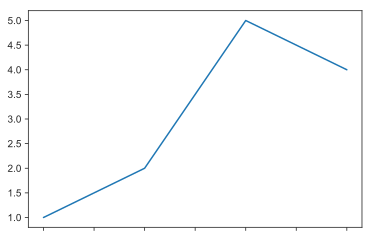

In [135]:
ser2.plot();

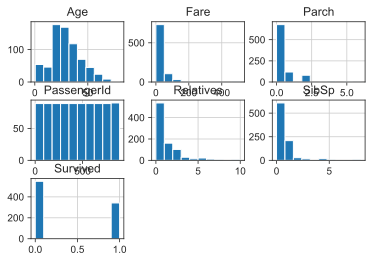

In [137]:
titanic_full_df.hist();

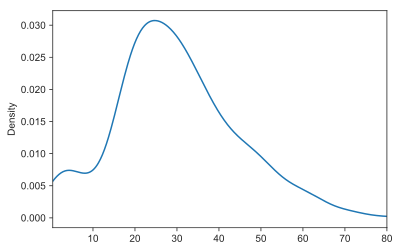

In [138]:
titanic_full_df["Age"].plot("kde", xlim=(titanic_full_df["Age"].min(), titanic_full_df["Age"].max()));

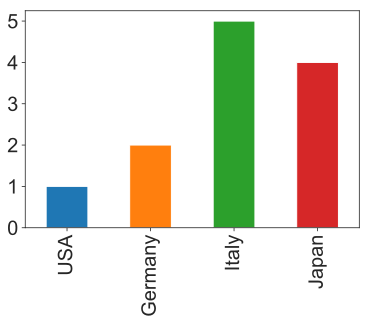

In [139]:
ser2.plot(kind="bar", fontsize=20);

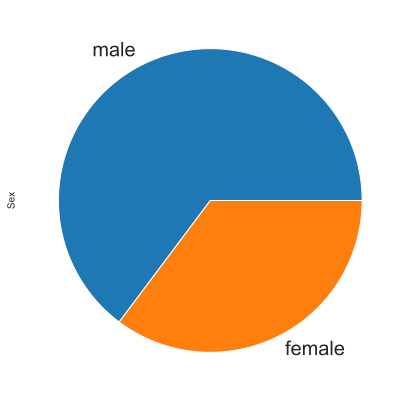

In [140]:
titanic_full_df["Sex"].value_counts().plot(kind="pie", figsize=(7, 7), fontsize=20);

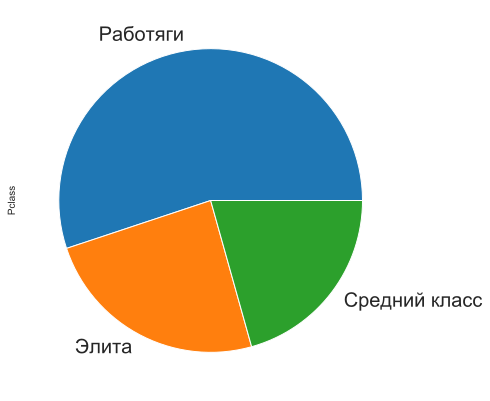

In [141]:
titanic_full_df["Pclass"].value_counts().plot(kind="pie", figsize=(7, 7), fontsize=20);

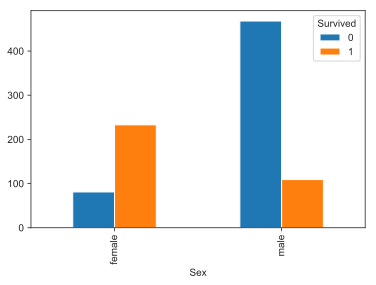

In [145]:
titanic_full_df[["Sex", "Survived"]].pivot_table(index=["Sex"], columns=["Survived"], aggfunc=len).plot(kind="bar");

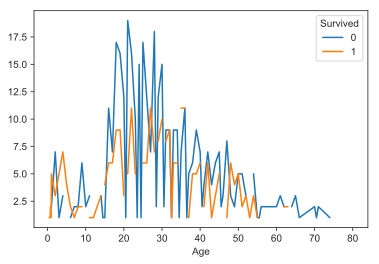

In [144]:
titanic_full_df[["Age", "Survived"]].pivot_table(index=["Age"], columns=["Survived"], aggfunc=len).plot();

## Самостоятельное задание

Вам предлагается поработать с [набором данных](https://data.lacity.org/A-Safe-City/Crime-Data-from-2010-to-Present/y8tr-7khq) о преступности на улицах LA.

### EDA
* Загрузите [случайную выборку](/datasets/la-crimes/la-crimes-sample.csv.zip) из этого набора данных.
* Сколько строк и столбцов в таблице?
* Каковы называния столбцов?
* Какие типы данных у различных столбцов?
* Сколько в каждом из них униальных значений?
* Сколько пропущенных?
* Взгляните на распределения числовых переменных.

### Жертвы
Начнём анализ жертв. В наборе данных имеется информация о Возрасте, Поле, и Происхождении каждоый жертвы. Есть ли связь между этими признаками?

* Люди какого происхождения чаще всего являются жертвами преступлений?
* Верно ли, что женщины чаще оказываются жертвами по сравнению с мужчинами?

### Преступления, пол и возраст
* Изучите распределение количества преступлений по возрасту. Какова тенденция? Люди какого возраста чаще всего подвергаются преступлениям? Есть ли локальные минимумы? Используйте типы графиков hist и density.
* Как различается вероятность женщин и мужчин стать жертвой в зависимости от возраста? Постройте визуализацию. В каком возрастном промежутке мужчины чаще становятся жетрвами преступлений?
* Определите 10 самых распространённых преступлений в LA. Постройте график.
* От каких преступлений чаще старадют женщины, а от каких мужчины?

### Происхождение

* A - Other Asian
* B - Black
* C - Chinese 
* D - Cambodian 
* F - Filipino 
* G - Guamanian 
* H - Hispanic/Latin/Mexican 
* I - American Indian/Alaskan Native 
* J - Japanese 
* K - Korean 
* L - Laotian 
* O - Other 
* P - Pacific Islander 
* S - Samoan 
* U - Hawaiian 
* V - Vietnamese 
* W - White 
* X - Unknown 
* Z - Asian Indian

Люди какого происхождения чаще всего подвергаются преступлениям?

### Место проишествия

* Отсортируйте районы, по количество преступлений. Постройте график, показывающий самые безопасные и опасный районы.
* Люди какого происхождения чаще всего страдают от преступлений в каждом из районов? Не забудьте нормировать на общее количество жертв.